# Importing all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Uploading the csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic Dataset.csv to Titanic Dataset (1).csv


# Importing the file and learning the data

In [ ]:
df = pd.read_csv('Titanic Dataset.csv')

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
df.shape

(1309, 14)

In [ ]:
df.duplicated().any()

np.False_

In [ ]:
df.isnull().any()

,0
pclass,False
survived,False
name,False
sex,False
age,True
sibsp,False
parch,False
ticket,False
fare,True
cabin,True


# Changing the dtypes

In [ ]:
df.dtypes

,0
pclass,int64
survived,int64
name,object
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


In [ ]:
int_cols = ['pclass', 'survived', 'sibsp', 'parch', 'body']
cat_cols = ['name', 'sex', 'embarked', 'cabin', 'boat', 'home.dest']

df[int_cols] = df[int_cols].apply(pd.to_numeric, errors='coerce').astype('Int64')
df[cat_cols] = df[cat_cols].astype('category')


# Checking for missing values

In [ ]:
mv = df.isnull().sum()
mp = (mv/len(df))*100
mp = mp.round(2)
data = pd.DataFrame({'Missing Values : ' : mv, 'Missing percentage : ' : mp})
data

,Missing Values :,Missing percentage :
pclass,0,0.00
survived,0,0.00
name,0,0.00
sex,0,0.00
age,263,20.09
sibsp,0,0.00
parch,0,0.00
ticket,0,0.00
fare,1,0.08
cabin,1014,77.46


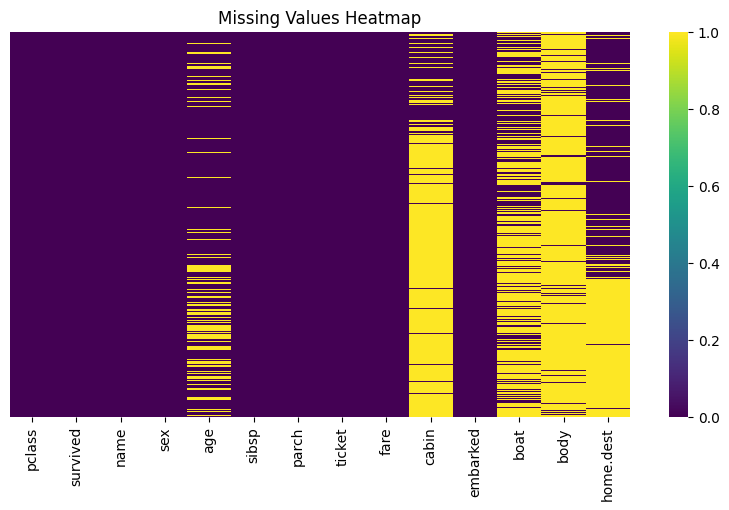

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Dropping some columns as the missing values of those columns are too high

In [ ]:
df.drop(columns = ['cabin', 'boat', 'body', 'home.dest'], inplace = True)

# Checking for outliers

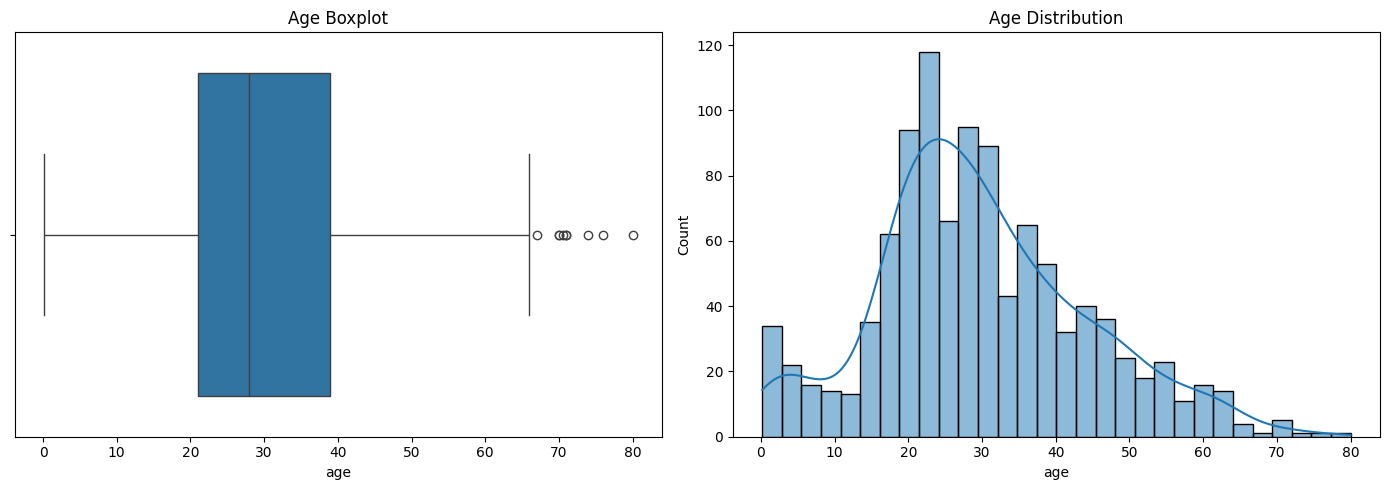

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x='age', data=df, ax=axes[0])
axes[0].set_title('Age Boxplot')

sns.histplot(df['age'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Age Distribution')
plt.tight_layout()
plt.show()


# Using SimpleImputer

In [ ]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [ ]:
si = SimpleImputer(strategy = 'median')
df['age'] = si.fit_transform(df[['age']])

In [ ]:
si = SimpleImputer(strategy = 'mean')
df['fare'] = si.fit_transform(df[['fare']])

In [ ]:
df.isnull().any()

,0
pclass,False
survived,False
name,False
sex,False
age,False
sibsp,False
parch,False
ticket,False
fare,False
embarked,False


# Converting categorical data into numeric data


In [ ]:
df.drop(columns=['name', 'ticket'], inplace = True)

In [ ]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns = ['sex', 'embarked'], drop_first= True)

In [ ]:
ordinal_enc = OrdinalEncoder(categories=[[1, 2, 3]])
df[['pclass']] = ordinal_enc.fit_transform(df[['pclass']])

In [ ]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [ ]:
df[['pclass', 'sex_male', 'embarked_Q', 'embarked_S']].head(10)

,pclass,sex_male,embarked_Q,embarked_S
0,0.0,False,False,True
1,0.0,True,False,True
2,0.0,False,False,True
3,0.0,True,False,True
4,0.0,False,False,True
5,0.0,True,False,True
6,0.0,False,False,True
7,0.0,True,False,True
8,0.0,False,False,True
9,0.0,True,False,False


# Feature Scaling

In [ ]:
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

# Function transformation

In [ ]:
df['fare'] = np.log1p(df['fare'])

# Train-Test split

In [ ]:
X = df.drop(columns=['survived'])
y = df['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1047, 8)
Test shape: (262, 8)
